In [7]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from src.fileutils import PROJECT_ROOT
from src.orientation.orientation_estimation import OrientationEstimation

In [9]:
model_path = PROJECT_ROOT / "models" / "doe" / "spindoe.ckpt"
use_gpu = False
orientation_estimator = OrientationEstimation(model_path, use_gpu, doe_expected_brightness=55)

# The 55 doe expected brightness was determined from the SpinDOE provided testing set (following cell)

Lightning automatically upgraded your loaded checkpoint from v1.9.3 to v2.2.1. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\agpri\OneDrive\Documents\GitHub\PingPongTracking\models\doe\spindoe.ckpt`


Saving hyperparmeters
DOE  initiated


55.714814814814815
58.27008868583714
57.33763325270984
57.981226864093074
59.44536940686785
57.16561686402956


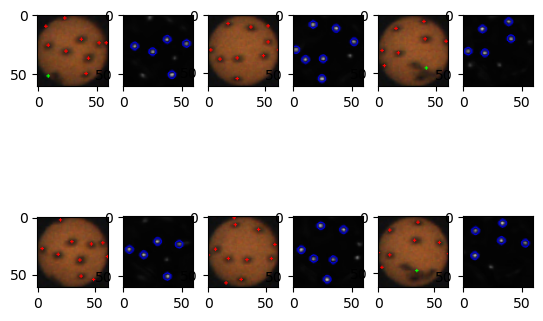

In [10]:
doe_test_images_dir = PROJECT_ROOT / "data" / "doe" / "test"
doe_test_images = list(doe_test_images_dir.glob("**/*.png"))


rdm_idx = np.random.choice(np.arange(len(doe_test_images)), 6, replace=False)
rdm_idx = np.arange(6)
aug_imgs = []
heatmaps = []
imgs = []
i = 0
for idx in rdm_idx:
    img = cv2.imread(str(doe_test_images[idx]))
    img = cv2.cvtColor(
        img, cv2.COLOR_BGR2RGB
    )
    print(np.mean(img))
    imgs.append(img)
    rot, aug_img, heatmap = orientation_estimator.doe.debug(img)
    heatmaps.append(heatmap)
    aug_imgs.append(aug_img)

    
fig, axs = plt.subplots(2, 6)
for i in range(6):
    axs[i % 2, 2 * (i % 3)].imshow(aug_imgs[i])
    axs[i % 2, 2 * (i % 3) + 1].imshow(heatmaps[i])

plt.show()


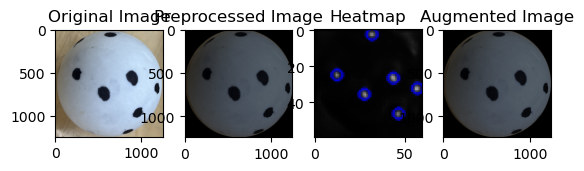

[-1.14347843  0.2335389   1.78940284]


In [13]:
white_test_image_path = PROJECT_ROOT / "data" / "orientation_images" / "white_ball_doe_1.png"
img = cv2.imread(str(white_test_image_path))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

rot, preprocessed_img, aug_img, heatmap = orientation_estimator.estimate_orientation_with_doe_debug(
        image=img,
        ball_mask=None,
        ball_center_x=img.shape[0]//2,
        ball_center_y=img.shape[1]//2,
        ball_radius=img.shape[0]//2,
    )

plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(preprocessed_img)
plt.title('Preprocessed Image')

plt.subplot(1, 4, 3)
plt.imshow(heatmap)
plt.title('Heatmap')

plt.subplot(1, 4, 4)
plt.imshow(aug_img)
plt.title('Augmented Image')

plt.show()
print(str(rot.as_euler('xyz')))